# k-Nearest Neighbors

O classificador baseado em instâncias mais conhecido é o chamado k-vizinhos-mais-próximos 
- k-nearest-neighbors, ou kNN

O vetor de atributos é  comparado com um certo número (k) de amostras de treinamento que mais se assemelham a ele
- A classe que for representada em mais rótulos nas amostras de treinamento selecionada é escolhida para o vetor de tributos

<img src="https://www.researchgate.net/profile/Saleh_Alaliyat/publication/267953942/figure/fig14/AS:295388776026147@1447437580523/K-nearest-neighbor-algorithm-illustration-The-green-circle-is-the-sample-which-is-to-be.png">


## Exemplo:

Executar a classificação kNN através do pacote de Machine Learning mais conhecido do Python, o `scikit-learn'.

Passos que seguiremos:
1. Carregar o arquivo de dados do iris dataset em um DataFrame do `pandas`.
2. Identificar os atributos do DataFrame
4. Selecionar um DataFrame com os atributos desejados
5. Treinar alguns classificadores kNN com parâmetros diferentes
6. Gerar um conjunto de dados de teste
7. Executar o classificador para os pontos gerados
8. Visualizar os resultados obtidos

In [7]:
#Importando o módulo pandas, e invocando como pd
import pandas as pd

# 1. Carregar o arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=header)

In [5]:
# 2. Inspecionar os dados
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


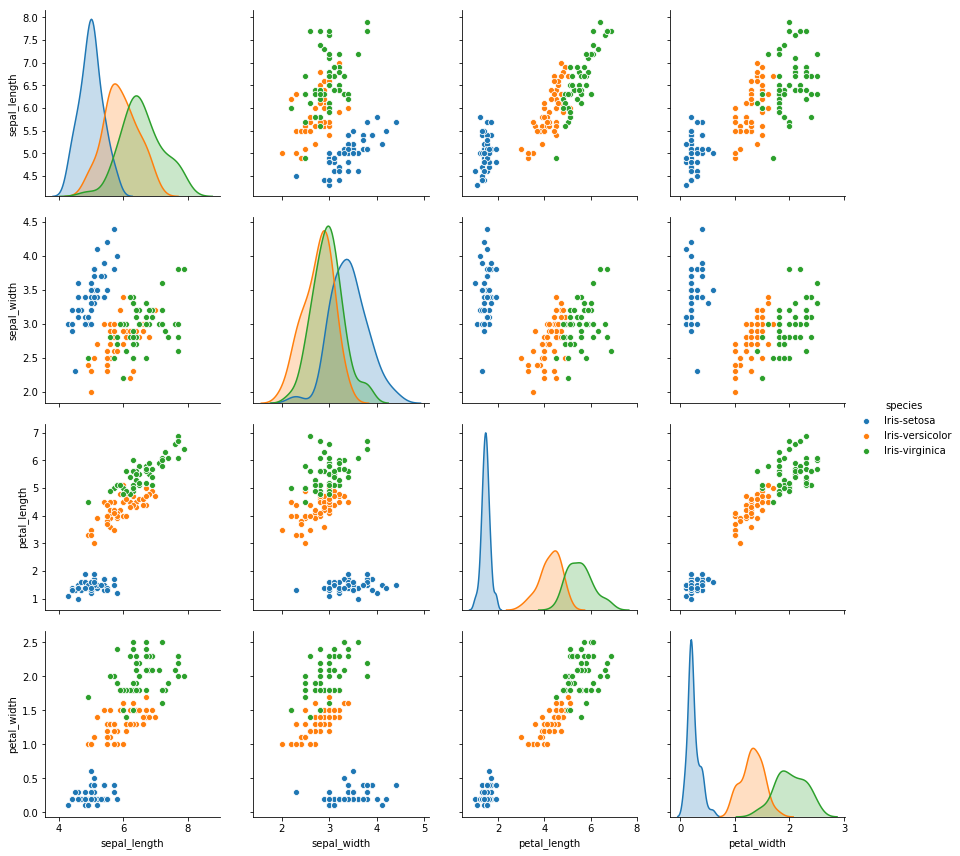

In [8]:
# 3. Visualizar os dados do DataFrame
import seaborn as sns
# Vamos usar a biblioteca seaborn par visualizar gráficos de dispersão entre todos os campos da tabela
sns.pairplot(df, hue='species', height=3)

In [14]:
# 4. Selecionando um sub-dataframe com os campos petal_length e petal_width
subdf = df[['petal_length', 'petal_width']]

# 5. Treinar classificadores kNN para diferents valores de k
# Para tanto, vamos importar o pacote sklearn (scikit-learn)
from sklearn.neighbors import KNeighborsClassifier
# Vamos criar classificador (também conhecido genericamente como modelos)
# que usam k = 1, 3, 5 e 7 vizinhos

k = 53 

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(subdf, df['species'])



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=53, p=2,
           weights='uniform')

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método predixt(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes

In [15]:
# 6. Gerar um conjunto de teste
# Cada linha é uma amostra do vetor de atributos
# Primeiramente, criamos uma lista de listas:
teste = [
    [0, 0],
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6],
    [7, 7]
]

# Então, convertemos a lista de listas em um array bidimensional
# do tipo float do módulo numpy
import numpy as np
teste = np.array(teste, dtype=float)

# 7. Execução do classificador, gerando um array de resultados,
#    iterando para todos os classificadores no dicionário
classes = knn.predict(teste)
print(classes)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


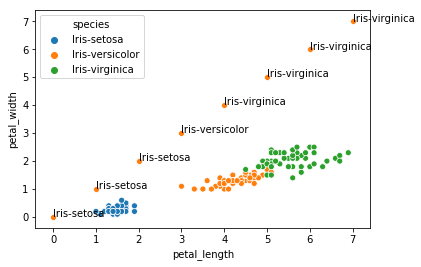

In [17]:
# 8. Visualizando o resultado usando o seaborn e matplotlib
# Escolha o classificador pelo k
# Primeiro, criamos um novo gráfico com o módulo matplotlib
import matplotlib.pyplot as plt
plt.figure()

# Usamos o scatterplot do seaborn informando os campos do dataframe
sns.scatterplot('petal_length', 'petal_width', hue='species', data=df)
sns.scatterplot(teste[:, 0], teste[:, 1])
for i in range(teste.shape[0]):
    plt.text(teste[i, 0], teste[i, 1], classes[i])